![Banner](https://www.logo.wine/a/logo/Walmart/Walmart-Logo.wine.svg)

# Walmart Sales Analysis

##1. Import pandas library to load the dataset into the dataframe

In [1]:
import pandas as pd

##2. Loading dataset to a dataframe 'df'

In [2]:
df = pd.read_excel('WalmartSales.xlsx')

##3. Displaying the content of the dataframe by top head function which return top 5 rows of the dataset

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3


##4. Details of the dataset which including column name and data type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


##5. Check the unique values available for the respective columns

In [5]:
print("Branch: ",df['Branch'].unique())
print("City: ",df['City'].unique())
print("Customer type: ",df['Customer type'].unique())
print("Gender: ",df['Gender'].unique())
print("Product line: ",df['Product line'].unique())
print("Payment: ",df['Payment'].unique())

Branch:  ['A' 'B' 'C']
City:  ['Yangon' 'Naypyitaw' 'Mandalay']
Customer type:  ['Member' 'Normal']
Gender:  ['Female' 'Male']
Product line:  ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Payment:  ['Ewallet' 'Cash' 'Credit card']


#Assignment tasks:

####1. Analyze the performance of sales and revenue at the city and branch level ( 5 marks)
* Creating a new column for 'Sales' (revenue) which is the product of 'Unit price' and 'Quantity'


In [6]:
df['Sales'] = df['Unit price'] * df['Quantity']

* Grouping it by 'City' and 'Branch' to calculate total sales


In [7]:
city_sales = df.groupby('City')['Sales'].sum().reset_index()
branch_sales = df.groupby('Branch')['Sales'].sum().reset_index()

* Grouping it by 'City' and 'Branch' to calculate total  quantity

In [8]:
city_quantity = df.groupby('City')['Quantity'].sum().reset_index()
branch_quantity = df.groupby('Branch')['Quantity'].sum().reset_index()

* Merging sales and quantity data

In [9]:
city_performance = pd.merge(city_sales, city_quantity, on='City', how='inner')
branch_performance = pd.merge(branch_sales, branch_quantity, on='Branch', how='inner')

* Printing results in tabular format

In [10]:
from tabulate import tabulate

print("City-wise Sales and Quantity")
print(tabulate(city_performance, headers='keys', tablefmt='pretty', showindex=False))
print("\nBranch-wise Sales and Quantity")
print(tabulate(branch_performance, headers='keys', tablefmt='pretty', showindex=False))

City-wise Sales and Quantity
+-----------+-----------+----------+
|   City    |   Sales   | Quantity |
+-----------+-----------+----------+
| Mandalay  | 101140.64 |   1820   |
| Naypyitaw | 105303.53 |   1831   |
|  Yangon   | 101143.21 |   1859   |
+-----------+-----------+----------+

Branch-wise Sales and Quantity
+--------+-----------+----------+
| Branch |   Sales   | Quantity |
+--------+-----------+----------+
|   A    | 103763.0  |   1883   |
|   B    | 107567.19 |   1899   |
|   C    | 96257.19  |   1728   |
+--------+-----------+----------+


Plotting the above results into a barplot for better understanding via visualization:

<ipython-input-13-92ff5f074b4e>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='City', y='Sales', data=city_performance, palette=colors, ci=None)
<ipython-input-13-92ff5f074b4e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Sales', data=city_performance, palette=colors, ci=None)
<ipython-input-13-92ff5f074b4e>:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='City', y='Quantity', data=city_performance, palette=colors, ci=None)
<ipython-input-13-92ff5f074b4e>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Quantity', data=city_perf

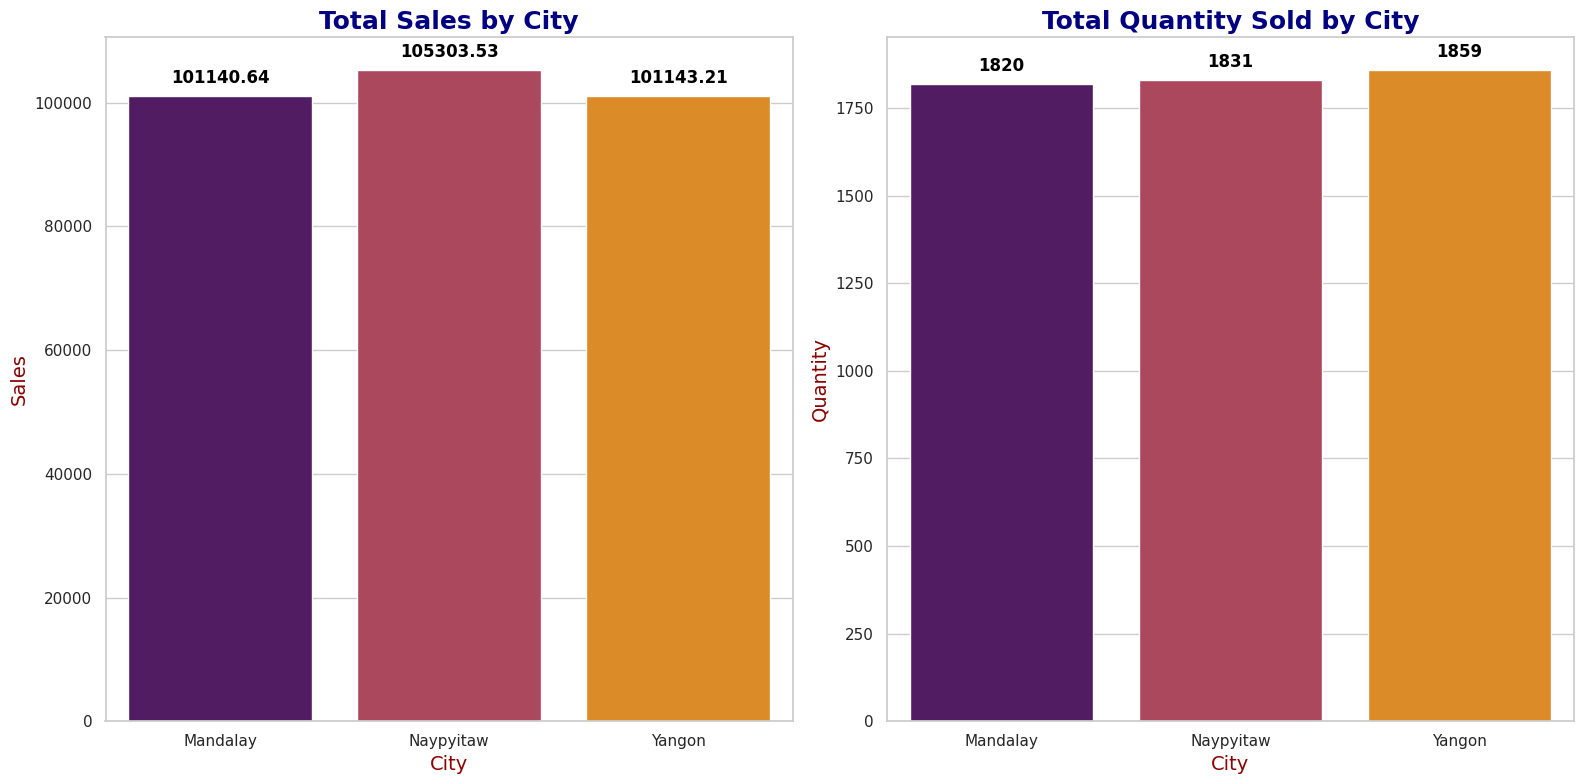

<ipython-input-13-92ff5f074b4e>:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Branch', y='Sales', data=branch_performance, palette=colors, ci=None)
<ipython-input-13-92ff5f074b4e>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Branch', y='Sales', data=branch_performance, palette=colors, ci=None)
<ipython-input-13-92ff5f074b4e>:57: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Branch', y='Quantity', data=branch_performance, palette=colors, ci=None)
<ipython-input-13-92ff5f074b4e>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Branch', y='Quantity', 

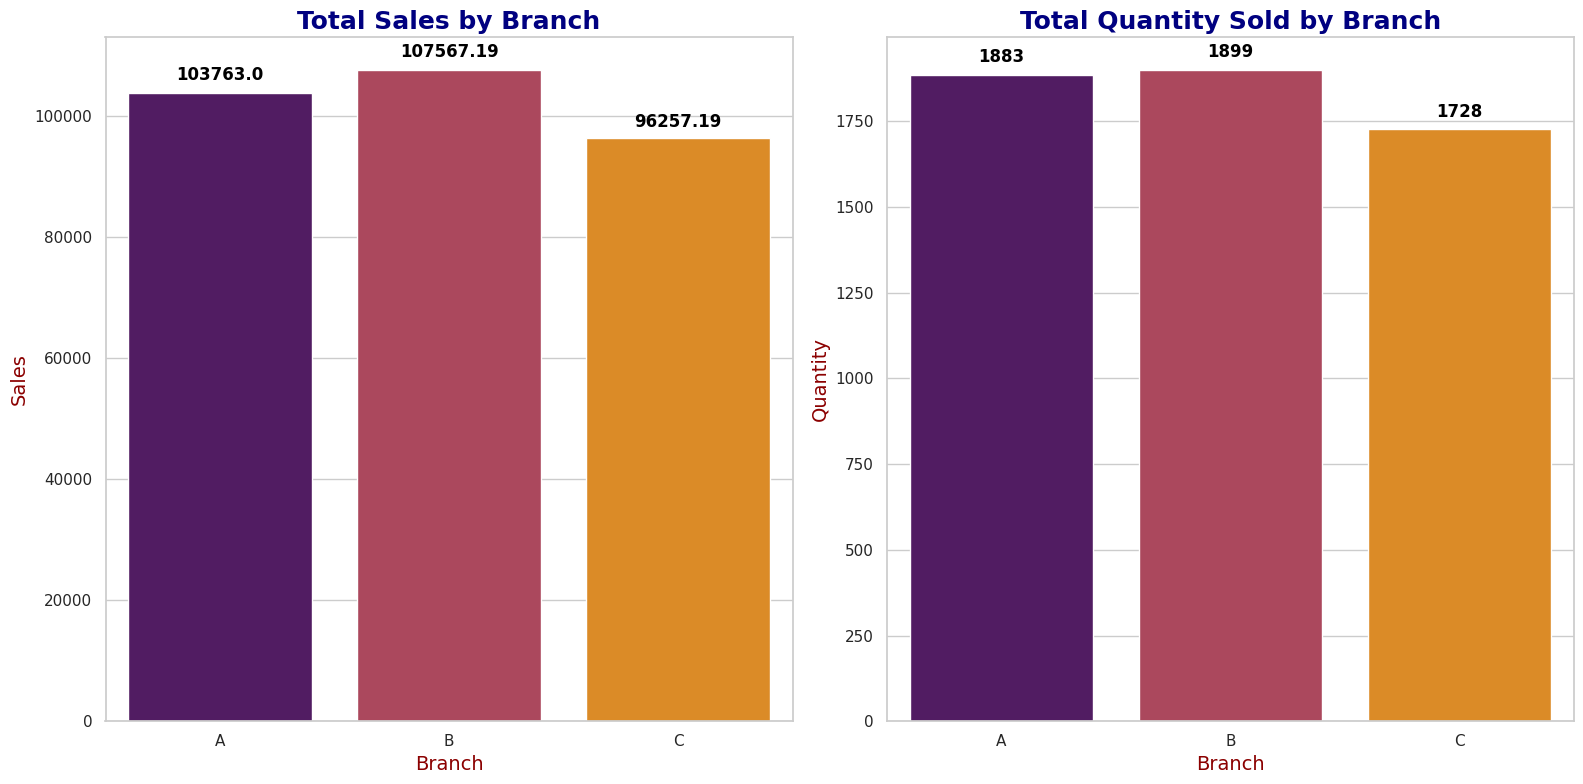

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the plot style
sns.set(style="whitegrid", palette="muted")

# Defining a custom color palette
colors = sns.color_palette("inferno", n_colors=3)

# Plotting City-wise Sales and Quantity
plt.figure(figsize=(16, 8))

# Total Sales by City
plt.subplot(1, 2, 1)
sns.barplot(x='City', y='Sales', data=city_performance, palette=colors, ci=None)
plt.title('Total Sales by City', fontsize=18, fontweight='bold', color='navy')
plt.ylabel('Sales', fontsize=14, color='darkred')
plt.xlabel('City', fontsize=14, color='darkred')

# Adding annotations for Sales
for i, row in city_performance.iterrows():
    plt.text(i, row['Sales'] + row['Sales'] * 0.02, f'{round(row["Sales"], 2)}',
             color='black', ha="center", fontsize=12, fontweight='bold')

# Total Quantity Sold by City
plt.subplot(1, 2, 2)
sns.barplot(x='City', y='Quantity', data=city_performance, palette=colors, ci=None)
plt.title('Total Quantity Sold by City', fontsize=18, fontweight='bold', color='navy')
plt.ylabel('Quantity', fontsize=14, color='darkred')
plt.xlabel('City', fontsize=14, color='darkred')

# Adding annotations for Quantity
for i, row in city_performance.iterrows():
    plt.text(i, row['Quantity'] + row['Quantity'] * 0.02, f'{round(row["Quantity"], 2)}',
             color='black', ha="center", fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Plotting Branch-wise Sales and Quantity
plt.figure(figsize=(16, 8))

# Total Sales by Branch
plt.subplot(1, 2, 1)
sns.barplot(x='Branch', y='Sales', data=branch_performance, palette=colors, ci=None)
plt.title('Total Sales by Branch', fontsize=18, fontweight='bold', color='navy')
plt.ylabel('Sales', fontsize=14, color='darkred')
plt.xlabel('Branch', fontsize=14, color='darkred')

# Adding annotations for Sales
for i, row in branch_performance.iterrows():
    plt.text(i, row['Sales'] + row['Sales'] * 0.02, f'{round(row["Sales"], 2)}',
             color='black', ha="center", fontsize=12, fontweight='bold')

# Total Quantity Sold by Branch
plt.subplot(1, 2, 2)
sns.barplot(x='Branch', y='Quantity', data=branch_performance, palette=colors, ci=None)
plt.title('Total Quantity Sold by Branch', fontsize=18, fontweight='bold', color='navy')
plt.ylabel('Quantity', fontsize=14, color='darkred')
plt.xlabel('Branch', fontsize=14, color='darkred')

# Adding annotations for Quantity
for i, row in branch_performance.iterrows():
    plt.text(i, row['Quantity'] + row['Quantity'] * 0.02, f'{round(row["Quantity"], 2)}',
             color='black', ha="center", fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

####2. What is the average price of an item sold at each branch of the city (10 marks)

* Grouping by City and Branch and calculate the average Unit price
* Renaming the columns for clarity

In [14]:
average_price = df.groupby(['City', 'Branch'])['Unit price'].mean().reset_index()

average_price.columns = ['City', 'Branch', 'Average Unit Price']
average_price['Average Unit Price'] = average_price['Average Unit Price'].round(2)

print(tabulate(average_price, headers='keys', tablefmt='pretty'))

+---+-----------+--------+--------------------+
|   |   City    | Branch | Average Unit Price |
+---+-----------+--------+--------------------+
| 0 | Mandalay  |   A    |       53.35        |
| 1 | Mandalay  |   B    |       56.13        |
| 2 | Mandalay  |   C    |       57.96        |
| 3 | Naypyitaw |   A    |       54.12        |
| 4 | Naypyitaw |   B    |       57.79        |
| 5 | Naypyitaw |   C    |       57.94        |
| 6 |  Yangon   |   A    |       55.64        |
| 7 |  Yangon   |   B    |       56.01        |
| 8 |  Yangon   |   C    |       52.68        |
+---+-----------+--------+--------------------+


Plotting the above results into a barplot for better understanding via visualization:

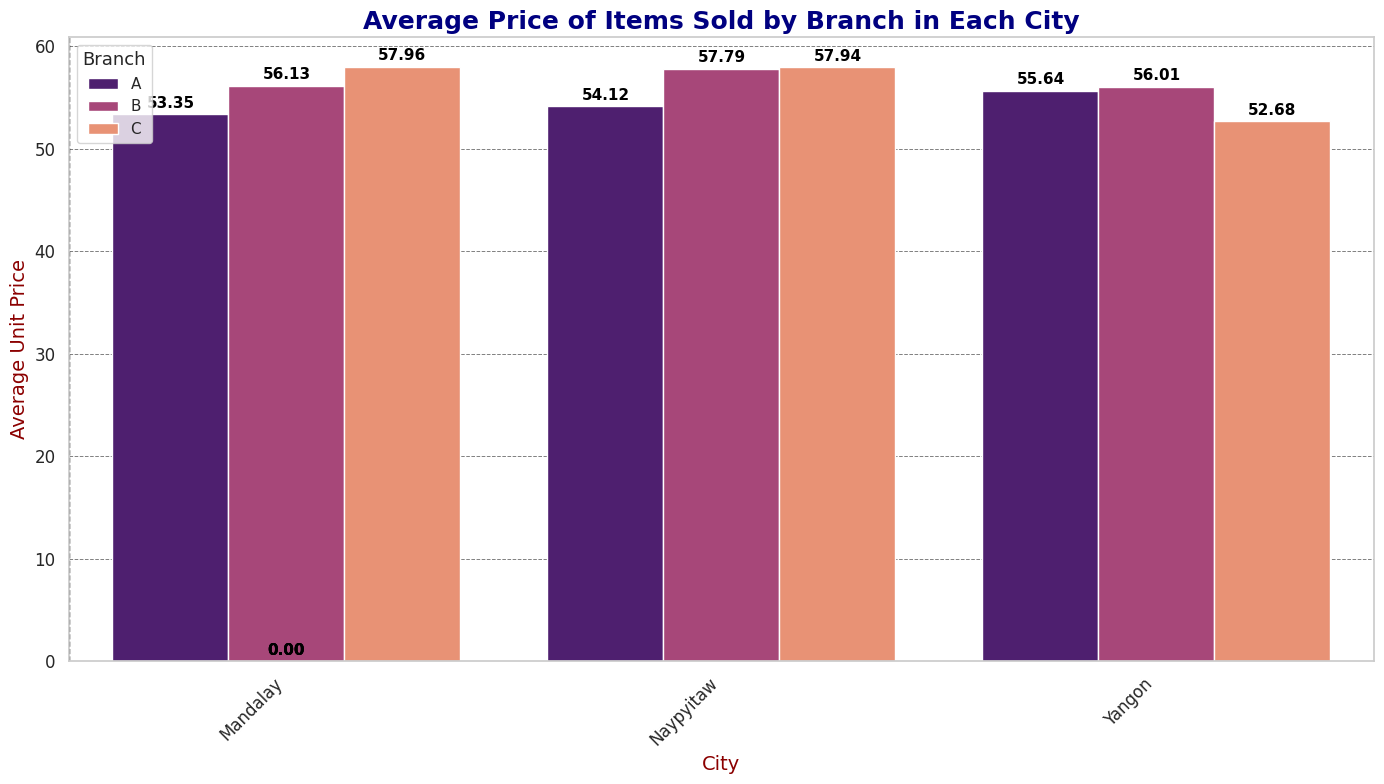

In [15]:
# Setting the plot style
sns.set(style="whitegrid", palette="muted")

# Defining a custom color palette
colors = sns.color_palette("magma", n_colors=3)

# Creating a grouped bar plot
plt.figure(figsize=(14, 8))

# Plotting with custom palette and improved aesthetics
sns.barplot(x='City', y='Average Unit Price', hue='Branch', data=average_price, palette=colors)

# Adding titles and labels with enhanced font properties
plt.title('Average Price of Items Sold by Branch in Each City', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('City', fontsize=14, color='darkred')
plt.ylabel('Average Unit Price', fontsize=14, color='darkred')

# Adjusting the annotation to avoid clumsiness
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.2f}',
                       (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center',
                       xytext=(0, 8),
                       textcoords='offset points',
                       fontsize=11,
                       fontweight='bold',
                       color='black')

# Customizing the legend
plt.legend(title='Branch', title_fontsize='13', fontsize='11', loc='upper left')

# Customizing the grid lines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, color='grey')

# Customizing the x-axis and y-axis ticks
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Adding a vertical line at the y-axis
plt.axvline(x=-0.5, color='black', linestyle='--', linewidth=1)


plt.tight_layout()
plt.show()

####3. Analyze the performance of sales and revenue, Month over Month across the Product line, Gender, and Payment Method, and identify the focus areas to get better sales for April 2019. (15 marks)

######Data Preparation


*   Converts the 'Date' column to datetime format using pd.to_datetime.
*   Extracts the month and year as a string in the format 'YYYY-MM' using df['Date'].dt.strftime('%Y-%m') and stores it in the new 'Month' column.



In [16]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.strftime('%Y-%m')

######Analyzing Monthly Performance

* Groups the DataFrame by 'Month', 'Product line', 'Gender', and 'Payment' columns.
* Aggregates the data using agg:
** 'Sales': calculated as the sum using 'sum'.
** 'Invoice ID': calculated as the count using 'count' (assuming it represents the number of transactions).
* Resets the index to create proper column names.
* Renames the 'Invoice ID' column to 'Transaction Count' for clarity.



In [17]:
monthly_performance = df.groupby(['Month', 'Product line', 'Gender', 'Payment']).agg({'Sales': 'sum', 'Invoice ID': 'count'}).reset_index()
monthly_performance.rename(columns={'Invoice ID': 'Transaction Count'}, inplace=True)

In [18]:
monthly_performance.head()

,Month,Product line,Gender,Payment,Sales,Transaction Count
0,2019-01,Electronic accessories,Female,Cash,2731.86,9
1,2019-01,Electronic accessories,Female,Credit card,3045.42,7
2,2019-01,Electronic accessories,Female,Ewallet,1576.48,7
3,2019-01,Electronic accessories,Male,Cash,3380.29,10
4,2019-01,Electronic accessories,Male,Credit card,2248.65,8


Month-over-Month Sales by Product Line

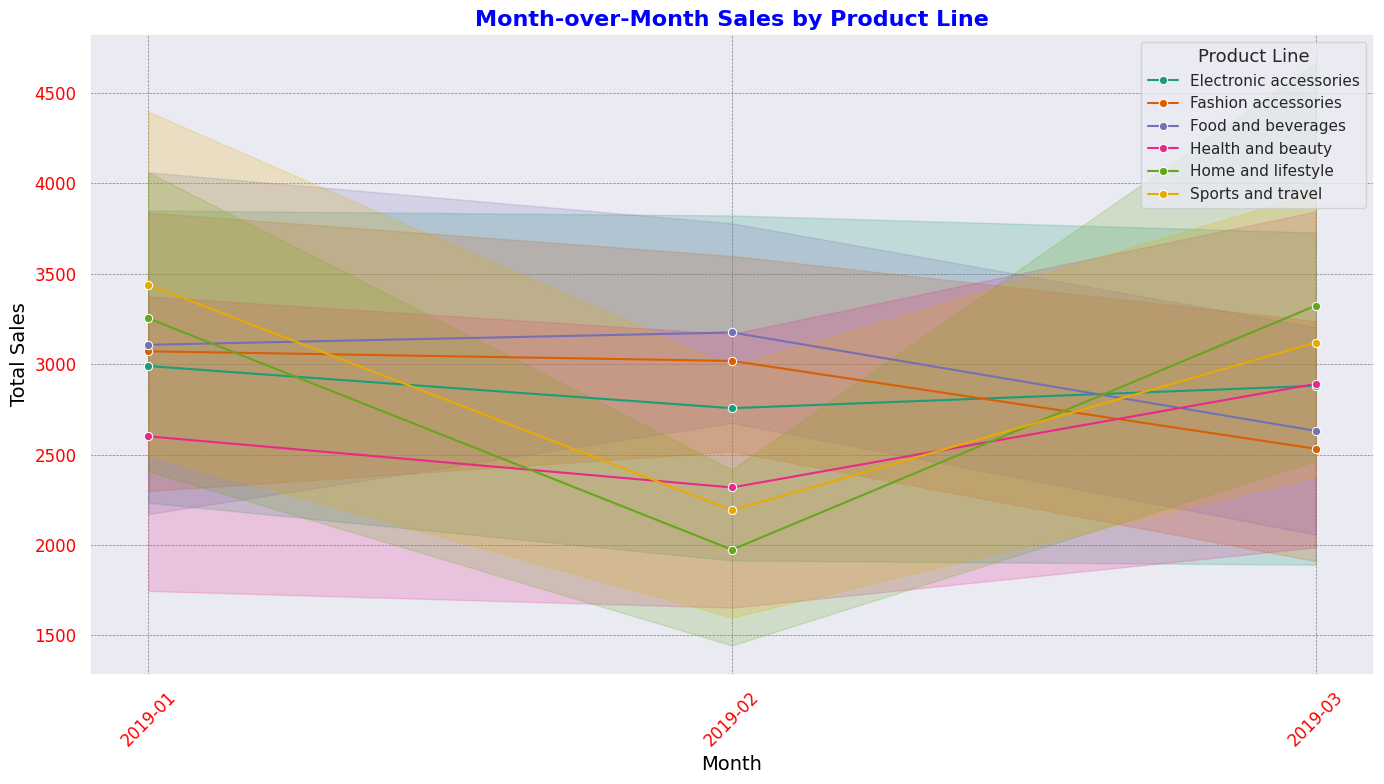

In [22]:
# Setting the plot style to dark background with white grid
sns.set(style="darkgrid", palette="muted")

# Plotting the Month-over-Month Sales across Product Lines
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_performance, x='Month', y='Sales', hue='Product line', marker='o', palette='Dark2')

# Adding titles and labels
plt.title('Month-over-Month Sales by Product Line', fontsize=16, fontweight='bold', color='Blue')
plt.xticks(rotation=45, fontsize=12, color='red')
plt.yticks(fontsize=12, color='red')
plt.xlabel('Month', fontsize=14, color='black')
plt.ylabel('Total Sales', fontsize=14, color='black')

# Adding grid lines for better readability
plt.grid(color='grey', linestyle='--', linewidth=0.5)

# Customizing legend
plt.legend(title='Product Line', title_fontsize='13', fontsize='11', loc='upper right')

plt.tight_layout()
plt.show()


Month-over-Month Sales by Gender

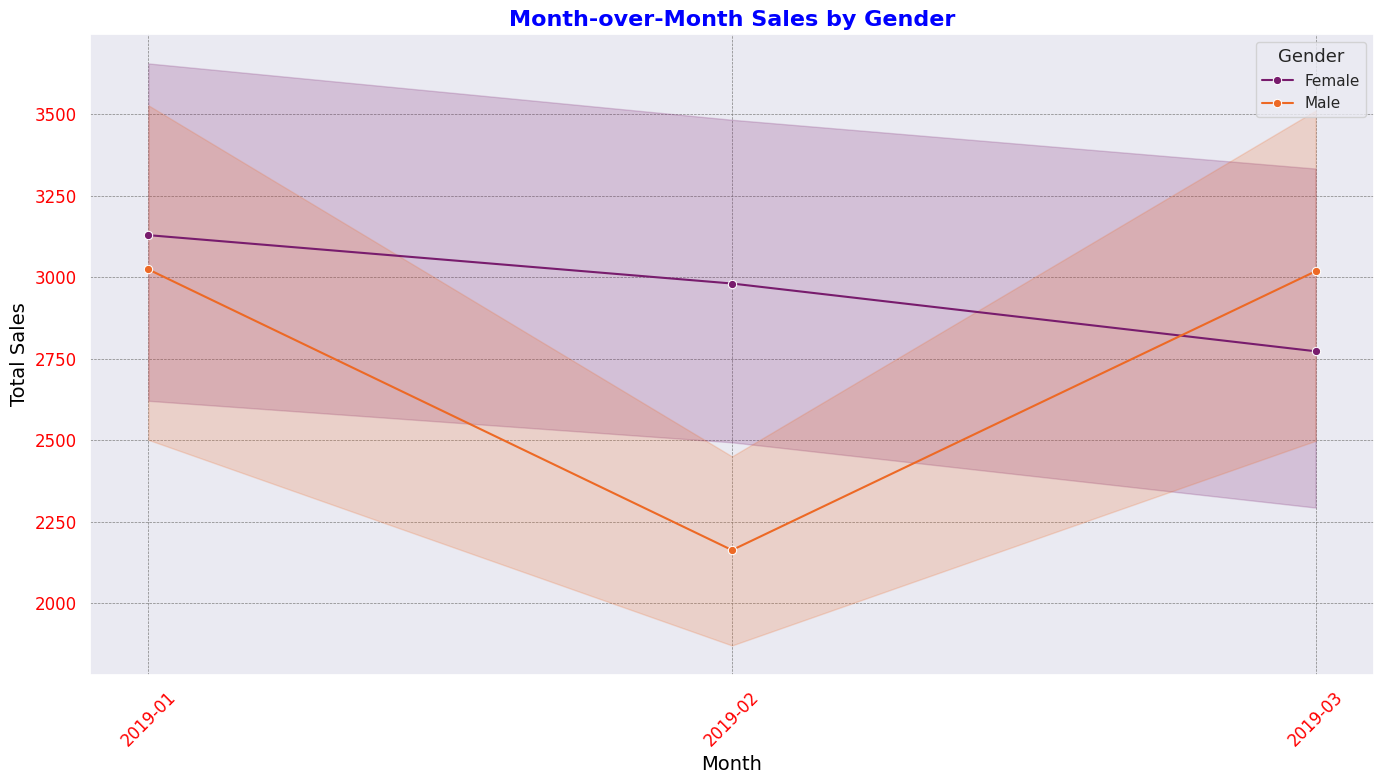

In [23]:
# Plotting the Month-over-Month Sales across Genders
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_performance, x='Month', y='Sales', hue='Gender', marker='o', palette='inferno')

# Adding titles and labels
plt.title('Month-over-Month Sales by Gender', fontsize=16, fontweight='bold', color='blue')
plt.xticks(rotation=45, fontsize=12, color='red')
plt.yticks(fontsize=12, color='red')
plt.xlabel('Month', fontsize=14, color='black')
plt.ylabel('Total Sales', fontsize=14, color='black')

# Adding grid lines for better readability
plt.grid(color='grey', linestyle='--', linewidth=0.5)

# Customizing legend
plt.legend(title='Gender', title_fontsize='13', fontsize='11', loc='upper right')

plt.tight_layout()
plt.show()

Month-over-Month Sales by Payment Method

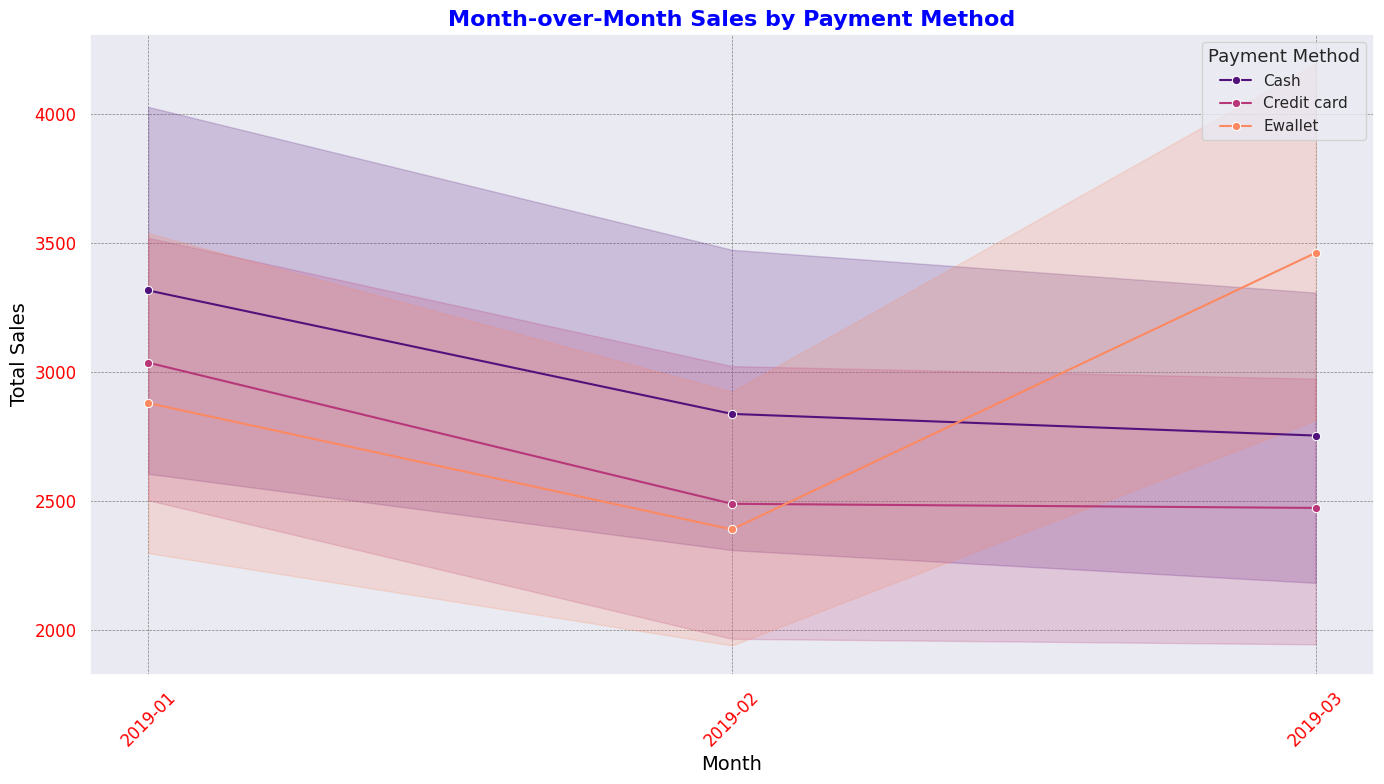

In [24]:
# Plotting the Month-over-Month Sales across Payment Methods
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_performance, x='Month', y='Sales', hue='Payment', marker='o', palette='magma')

# Adding titles and labels
plt.title('Month-over-Month Sales by Payment Method', fontsize=16, fontweight='bold', color='blue')
plt.xticks(rotation=45, fontsize=12, color='red')
plt.yticks(fontsize=12, color='red')
plt.xlabel('Month', fontsize=14, color='black')
plt.ylabel('Total Sales', fontsize=14, color='black')

# Adding grid lines for better readability
plt.grid(color='grey', linestyle='--', linewidth=0.5)

# Customizing legend
plt.legend(title='Payment Method', title_fontsize='13', fontsize='11', loc='upper right')

plt.tight_layout()
plt.show()

# Focus areas to improve sales for April 2019:



1.   Product Line Focus:

 *   Electronic Accessories: This category showed a consistent upward trend. Increasing marketing efforts and promotions for electronic accessories could capitalize on this momentum.
 *   Food and Beverages: This category also showed a positive trend. Consider introducing new products or special offers to boost sales further.

2.   Gender-Based Marketing:

 *   Female Customers: Sales for female customers were higher compared to male customers. Tailoring marketing campaigns and promotions specifically for female customers could enhance sales.
 *   Male Customers: Although lower, there is potential to increase sales by targeting male customers with specific promotions or products that cater to their preferences.


3.   Payment Method Optimization:

 *   E-wallet: This payment method showed a strong upward trend. Encouraging the use of e-wallets through discounts or cashback offers could drive more sales.
 *   Credit Card: While stable, there is room for growth. Offering installment plans or special credit card promotions might attract more customers.




## By focusing on these areas, we can strategically enhance sales for April 2019.